# **Import Library**

In [2]:
import tensorflow as tf # Mengimport library TensorFlow untuk pengembangan model machine learning.
import numpy as np # Mengimport library NumPy untuk operasi numerik dan manipulasi array.
import pandas as pd #  untuk manipulasi dan analisis data menggunakan struktur data DataFrame.
import matplotlib.pyplot as plt # membuat visualisai grafik dan plot.
import seaborn as sns # meningkatkan keindahan visualisasi data.
from sklearn.preprocessing import LabelBinarizer # melakukan binarisasi label kategori.
from sklearn.model_selection import train_test_split # membagi data menjadi subset pelatihan dan pengujian.
from sklearn.metrics import classification_report # mengevaluasi kinerja model klasifikasi.
import zipfile # mengimport library zipfile untuk menangani file zip.

# **Load Dataset**

## **Load MNIST**

In [3]:
from tensorflow.keras.datasets import mnist

In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Kode ini digunakan untuk mengakses dataset MNIST melalui TensorFlow. Data gambar dan labelnya dipisahkan antara data pelatihan dan data pengujian untuk digunakan dalam pengembangan dan evaluasi model machine learning, terutama model pengenalan angka tulisan tangan.

In [6]:
# Check shape data
(train_data.shape, test_data.shape)

# Mengembalikan tuple yang berisi bentuk data pelatihan dan data pengujian. Ini memberikan informasi tentang jumlah sampel dan dimensi gambar dalam setiap dataset.

((60000, 28, 28), (10000, 28, 28))

In [7]:
# Check shape labels
(train_labels.shape, test_labels.shape)

# Mengembalikan tuple yang berisi bentuk label pelatihan dan label pengujian. Ini memberikan informasi tentang jumlah label dalam setiap dataset.

((60000,), (10000,))

In [8]:
# Check each data shape --> should be 28*28
train_data[0].shape

# Memeriksa bentuk gambar pertama dalam dataset pelatihan. Ini memberikan informasi tentang dimensi gambar pertama dalam dataset, yang seharusnya 28x28 piksel.

(28, 28)

In [51]:
# Check the label
train_labels.shape

# Mengembalikan bentuk label pelatihan.

(60000,)

### **Combine Train and Test Data**

In [52]:
digits_data = np.vstack([train_data, test_data]) #Menggabungkan data pelatihan (train_data) dan data pengujian (test_data) secara vertikal menggunakan np.vstack sehingga membentuk satu array data gabungan (digits_data).
digits_labels = np.hstack([train_labels, test_labels]) #Menggabungkan label pelatihan (train_labels) dan label pengujian (test_labels) secara horizontal menggunakan np.hstack sehingga membentuk satu array label gabungan (digits_labels).

In [11]:
# Check data shape
digits_data.shape #Mengembalikan bentuk dari array data gabungan.

(70000, 28, 28)

In [12]:
# Check label shape
digits_labels.shape #Mengembalikan bentuk dari array label gabungan.

(70000,)

Text(0.5, 1.0, 'Class: 3')

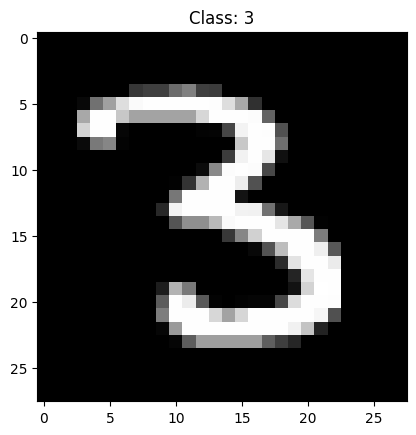

In [13]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0]) #Menghasilkan indeks acak untuk memilih sampel dari array data gabungan.
plt.imshow(digits_data[idx], cmap='gray') #Menampilkan gambar dari sampel yang dipilih dengan skala warna abu-abu ('gray').
plt.title('Class: ' + str(digits_labels[idx])) #Menampilkan judul grafik dengan kelas/label dari sampel yang dipilih.

<Axes: xlabel='Labels', ylabel='count'>

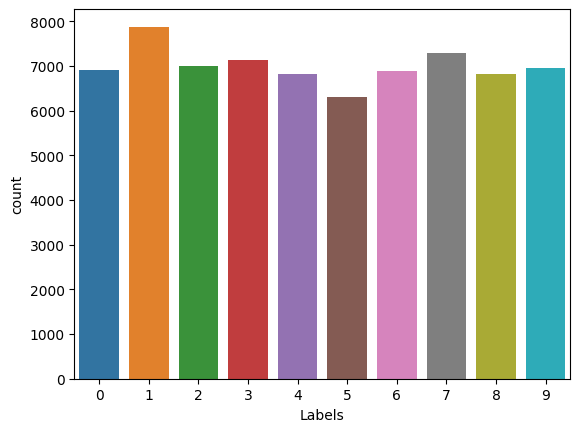

In [14]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels']) #Membuat DataFrame Pandas dari array label gabungan dengan nama kolom 'Labels'.
sns.countplot(df_labels, x='Labels') # Menampilkan count plot menggunakan Seaborn untuk mengevaluasi distribusi label dalam dataset.

## **Load Kaggle A-Z**

In [15]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-11-30 18:51:19--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   110MB/s    in 1.7s    

2023-11-30 18:51:21 (110 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [16]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r') # Membuat objek zip menggunakan ZipFile dari library zipfile, dengan mode 'r' untuk membaca (read).
zip_object.extractall('./') # Mengekstrak seluruh isi file zip ke dalam direktori saat ini ('./').
zip_object.close() # Menutup objek zip setelah proses ekstraksi selesai.

In [17]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32') #Membaca file CSV yang telah diekstrak menjadi DataFrame Pandas, dan mengonversi tipe data ke float32.
dataset_az #Menampilkan DataFrame dataset_az.

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1) #Menghapus kolom dengan label '0' dari DataFrame untuk mendapatkan data piksel.
# Get labels only
alphabet_labels = dataset_az['0'] #Mengambil kolom '0' sebagai label.

In [19]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape #Mengembalikan bentuk data piksel dan label.

((372450, 784), (372450,))

In [20]:
# Check shape labels
alphabet_labels.shape # Mengembalikan bentuk label.

(372450,)

In [21]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28)) #Menggunakan NumPy untuk mengubah bentuk data piksel menjadi matriks 28x28.
# Check the result by its shape
alphabet_data.shape #Mengembalikan bentuk data piksel setelah perubahan bentuk.

(372450, 28, 28)

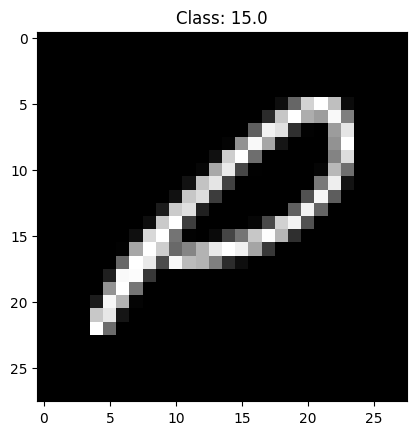

In [22]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0]) #Menghasilkan indeks acak untuk memilih sampel dari dataset A-Z.
plt.imshow(alphabet_data[index], cmap = 'gray') # Menampilkan gambar dari sampel yang dipilih dengan skala warna abu-abu ('gray').
plt.title('Class: ' + str(alphabet_labels[index])); #Menampilkan judul grafik dengan kelas/label dari sampel yang dipilih.

<Axes: xlabel='Labels', ylabel='count'>

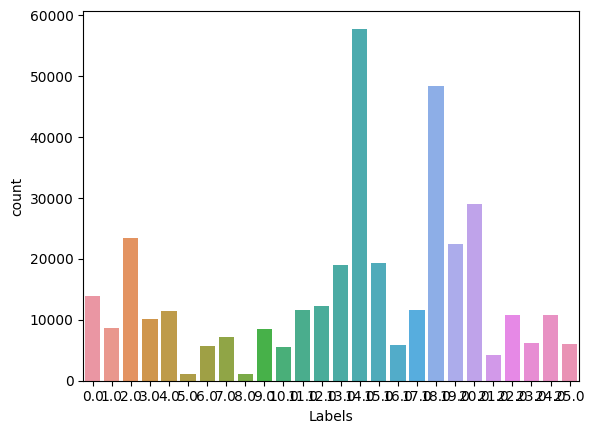

In [23]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
}) # Membuat DataFrame Pandas dari array label.
sns.countplot(df_az_labels, x='Labels') #Menampilkan count plot menggunakan Seaborn untuk mengevaluasi distribusi label dalam dataset A-Z.

## **Combine Dataset (MNIST + Kaggel A-Z)**

In [24]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [26]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [27]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [28]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [29]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [30]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [31]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [32]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

# **Preprocessing**

In [33]:
# Normalize data
data /= 255.0

In [34]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [35]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [36]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

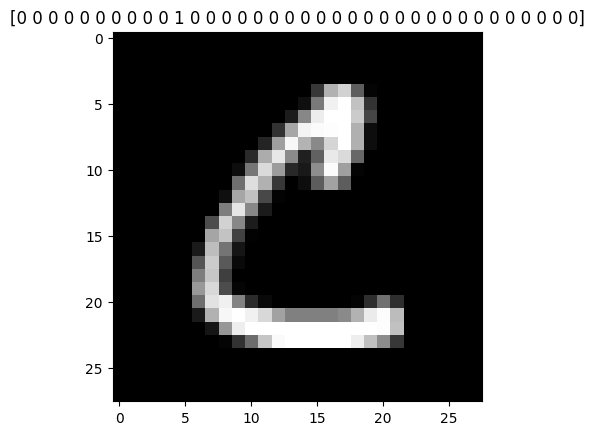

In [37]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [38]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [39]:
# Check the biggest value of data
classes_total.max()

57825

In [40]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# **Split Data to Train and Test**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## **Create Data Augmentation**

In [42]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# **Build CNN Model**

In [44]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [45]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [47]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## **Train model**

In [48]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [49]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [50]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1637 - accuracy: 0.8275
Epoch 1: val_loss improved from inf to 0.25008, saving model to custom_ocr.model
2765/2765 [==============================] - 171s 57ms/step - loss: 2.1637 - accuracy: 0.8275 - val_loss: 0.2501 - val_accuracy: 0.8994
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.9742 - accuracy: 0.9016
Epoch 2: val_loss improved from 0.25008 to 0.19898, saving model to custom_ocr.model
2765/2765 [==============================] - 147s 53ms/step - loss: 0.9743 - accuracy: 0.9016 - val_loss: 0.1990 - val_accuracy: 0.9265
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8044 - accuracy: 0.9142
Epoch 3: val_loss did not improve from 0.19898
2765/2765 [==============================] - 149s 54ms/step - loss: 0.8044 - accuracy: 0.9142 - val_loss: 0.2260 - val_accuracy: 0.9054
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.7111 - accu

# **Evaluate Model**

## **Make a Single Prediction**

In [54]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [56]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]
# Menampilkan probabilitas prediksi untuk setiap label dari data dengan indeks 1.

array([1.7453978e-22, 2.2933914e-13, 1.7501672e-12, 1.3882045e-18,
       4.3520246e-21, 6.6286083e-13, 2.3412691e-26, 3.2462639e-13,
       7.1960166e-16, 6.5507563e-21, 1.3650595e-14, 1.5310376e-11,
       5.4023788e-13, 1.5578799e-10, 3.0513703e-16, 8.6442913e-18,
       3.2321761e-14, 7.1122990e-13, 9.9932718e-01, 6.6166127e-04,
       3.2147272e-14, 1.2115847e-11, 1.0564231e-21, 1.4404597e-14,
       6.3591091e-11, 2.9195071e-12, 4.5686041e-18, 3.4819971e-16,
       4.6269347e-12, 1.1244134e-05, 2.7162718e-11, 7.3069712e-15,
       9.4195118e-18, 5.7929428e-10, 4.6676709e-13, 1.5038335e-09],
      dtype=float32)

In [57]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])
# Menggunakan NumPy untuk mendapatkan indeks label dengan probabilitas tertinggi, yang merupakan prediksi aktual.

18

In [58]:
# Check label for 24
name_labels[18]
# Menampilkan label yang sesuai dengan kelas 18 (indeks 18).

'I'

In [59]:
# Check y_test label for 0
y_test[1]
# Menampilkan label yang sesuai dengan data uji untuk indeks 1.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
# check the highest value
np.argmax(y_test[1])
# Menggunakan NumPy untuk mendapatkan indeks label dengan nilai tertinggi dari data uji untuk indeks 1.

18

In [61]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]
# Menampilkan label yang sesuai dengan kelas yang memiliki nilai tertinggi pada data uji untuk indeks 18.

'S'

Kode ini digunakan untuk memeriksa prediksi aktual dan label yang sesuai untuk data tertentu dalam konteks pengujian model klasifikasi. Ini membantu dalam evaluasi sejauh mana model berhasil memprediksi kelas yang benar untuk data tertentu pada saat pengujian.

## **Make an Evaluation on Test Data**

In [67]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 10s 4ms/step - loss: 0.1481 - accuracy: 0.9453


[0.14811360836029053, 0.9453045725822449]

In [68]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))
#Mencetak laporan klasifikasi menggunakan fungsi classification_report dari scikit-learn, dengan membandingkan label aktual dari y_test dan label prediksi dari predictions.

              precision    recall  f1-score   support

           0       0.31      0.76      0.44      1381
           1       0.97      0.99      0.98      1575
           2       0.91      0.97      0.94      1398
           3       0.92      1.00      0.96      1428
           4       0.94      0.96      0.95      1365
           5       0.79      0.92      0.85      1263
           6       0.90      0.98      0.94      1375
           7       0.95      0.99      0.97      1459
           8       0.96      0.98      0.97      1365
           9       0.96      0.99      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.98      0.99      1734
           C       0.99      0.98      0.98      4682
           D       0.93      0.96      0.95      2027
           E       0.99      0.99      0.99      2288
           F       0.97      1.00      0.99       233
           G       0.97      0.93      0.95      1152
           H       0.98    

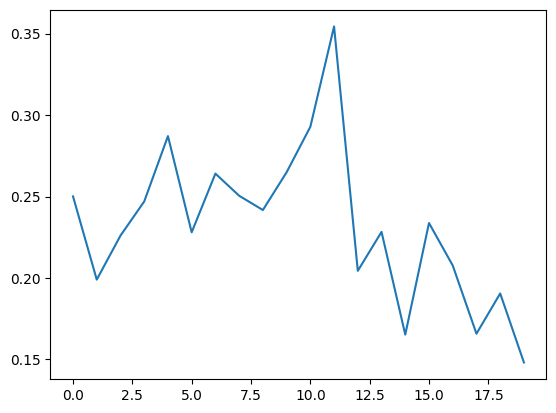

In [69]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])
#Menampilkan grafik garis dari nilai loss pada set validasi (val_loss) untuk setiap epoch yang telah dilatih.

In [70]:
# You can also check the another metrics
history.history.keys()
#Menampilkan kunci (keys) yang tersedia dalam objek

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

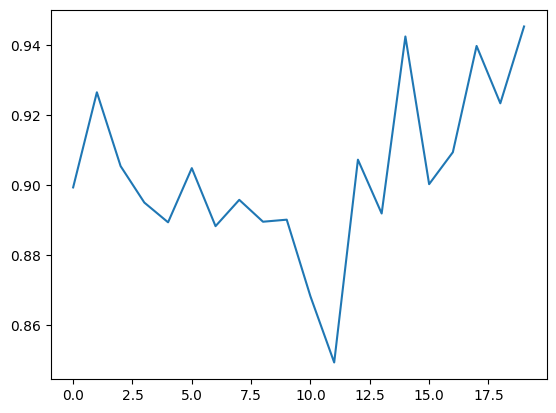

In [71]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])
# Menampilkan grafik garis dari nilai akurasi pada set validasi (val_accuracy) untuk setiap epoch yang telah dilatih.

Kode ini digunakan untuk mengevaluasi model neural network pada data uji, mencetak laporan klasifikasi, dan memvisualisasikan metrik seperti loss dan akurasi selama pelatihan model. Visualisasi ini membantu dalam memahami performa model dan identifikasi overfitting atau underfitting selama pelatihan

# **Save The Model**

In [72]:
# The result will show in colab directory
network.save('network', save_format= 'h5')
# Menyimpan model neural network (disebut 'network') ke dalam file dengan format 'h5'.
# Model disimpan dengan nama file 'network'.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Testing on Real Image**

In [74]:
# Import library
from tensorflow.keras.models import load_model

In [75]:
# Load saved network
load_network = load_model('network')
# Memuat model neural network yang telah disimpan dengan nama file 'network' dan menyimpannya dalam variabel load_network.

In [76]:
# Check summary
load_network.summary()
# Menampilkan ringkasan (summary) dari model neural network yang telah dimuat.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

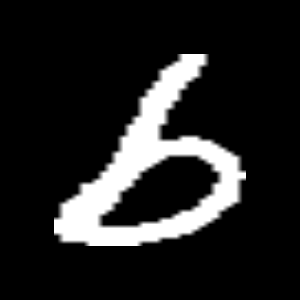

In [88]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/b_small.png')  # Membaca gambar dengan nama file 'b_small.png' menggunakan OpenCV.
cv2_imshow(img)  # Menampilkan bentuk (shape) dari gambar.

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
# Check shape
img.shape # Menampilkan bentuk (shape) dari citra grayscale.

(300, 300, 3)

In [90]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

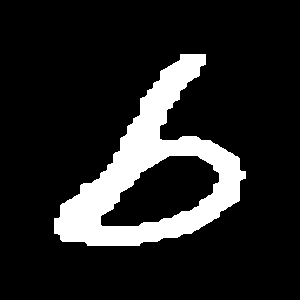

120.0


In [91]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [92]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [93]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape # Menampilkan bentuk (shape) dari gambar input setelah penambahan dimensi "jumlah data".

(28, 28, 1)

In [94]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1)) # Menambahkan dimensi "jumlah data" pada gambar input (duplikasi).
img_input.shape #  Menampilkan bentuk (shape) dari gambar input setelah duplikasi dimensi "jumlah data".

(1, 28, 28, 1)

In [95]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 199ms/step


6

In [96]:
# check label for 6
name_labels[6] # Menampilkan label yang sesuai dengan kelas 6

'6'